                                                PRINCIPAL COMPONENT ANALYSIS                                                    

PCA is an unsupervised machine learning technique used to solve problems on dimensionality reducation.

PCA is a statistical technique used for dimensionality reduction while preserving as much variance in the data as possible. It transforms the data into a new coordinate system, where the axes (principal components) capture the maximum variance in descending order.

Working of PCA:-

1. Calculate the Mean (Center the Data): For PCA, data must be mean-centered to ensure all features are measured relative to their average. This involves:

- Computing the mean for each feature: 𝑋ˉ= 1/𝑁 ∑𝑋𝑖 
    - where:
        - N is the number of samples,
        - Xi is the value of feature 𝑋 for the 𝑖th data point.

- Subtracting the mean from each data point:
    - 𝑋_centered = 𝑋−𝑋ˉ

This ensures the data is centered around zero, which is crucial because PCA assumes the dataset is centered.

2. Standardization (Optional but Recommended): If the features in the dataset are on different scales or units, standardization ensures that all features contribute equally to PCA. Standardization transforms the data to have a mean of 0 and a standard deviation of 1:
    - 𝑍 = (𝑋−𝑋ˉ)/𝜎
        - where 
            - σ is the standard deviation of the feature.

3. Calculate the Covariance Matrix: The covariance matrix represents the relationships between the features:
    - Cov(𝑋,𝑌) = ∑(𝑋𝑖−𝑋ˉ)(𝑌𝑖−𝑌ˉ) / 𝑁−1

- Diagonal elements: Variance of each feature.
- Off-diagonal elements: Covariance between two features.

For a dataset with 𝑑 features, the covariance matrix 𝑆 is a 𝑑×𝑑 matrix:
    - 𝑆=[ Var(𝑋1) Cov(𝑋1,𝑋2)   …   Cov(𝑋1,𝑋𝑑) ]
        |Cov(𝑋2,𝑋1) Var(𝑋2)   …   Cov(𝑋2,𝑋𝑑)  |
        |      ⋮       ⋮        ⋱       ⋮       |
        [Cov(𝑋𝑑,𝑋1) Cov(𝑋𝑑,𝑋2) …   Var(𝑋𝑑)   ]  

The covariance matrix summarizes how features vary with one another.

4. Calculate Eigenvalues and Eigenvectors: 
- Eigenvalues (𝜆): Represent the amount of variance captured by each principal component.
Solve the equation:
    - det(𝑆−𝜆I)=0
    - where 
        - 𝑆 is the covariance matrix,
        - I is the identity matrix.

- Eigenvectors: Represent the directions of the principal components (axes in the new coordinate system).
For each eigenvalue, its corresponding eigenvector is computed by solving:
    - (𝑆−𝜆I)𝑣=0,
    - where
        - v is the eigenvector.

The eigenvalues and eigenvectors come in pairs, with each eigenvalue corresponding to its eigenvector.

5. Sort Eigenvalues and Select Principal Components: 
- Sort Eigenvalues: Arrange the eigenvalues in descending order. The larger the eigenvalue, the more variance that principal component captures.
- Select 𝑘 Components: Choose the top 𝑘 eigenvalues (and their eigenvectors) to reduce dimensionality while retaining most of the variance.
- Use the explained variance ratio to decide how many components to keep:
    - Explained Variance Ratio = 𝜆𝑘/∑𝜆,
    - where,
        - 𝜆𝑘 is the 𝑘 th eigenvalue.
        
Retain components that cumulatively explain a high percentage (e.g., 95%) of the variance.


6. Project Data onto the Principal Components: The data is transformed into the new coordinate system by projecting it onto the eigenvectors:
- 𝑋_PCA = 𝑋_centered ⋅ 𝑉𝑘
- where:
    - Vk is the matrix of the top k eigenvectors,
    - 𝑋_PCA​ is the transformed data in the reduced dimension.

+ NOTE:
Reconstruction: If needed, the original data can be approximately reconstructed using the principal components:
    - 𝑋_reconstructed =𝑋_PCA ⋅ 𝑉𝑘^𝑇 + 𝑋ˉ 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [9]:
raw_data = pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\customer.csv")
raw_data

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Data Cleaning

In [7]:
raw_data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'CustomerLifetimeValue', 'Response',
       'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
       'Gender', 'Income', 'LocationCode', 'MaritalStatus',
       'MonthlyPremiumAuto', 'MonthsSinceLastClaim',
       'MonthsSincePolicyInception', 'NumberofOpenComplaints',
       'NumberofPolicies', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'ClaimAmount', 'VehicleClass', 'VehicleSize'],
      dtype='object')

In [10]:
cleaned_data = raw_data.drop(columns=['Unnamed: 0', 'Customer', 'State','LocationCode','SalesChannel','VehicleClass', 'VehicleSize', 'PolicyType', 'Response', 'EffectiveToDate'])
cleaned_data

,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,ClaimAmount
0,2763.519279,Basic,Bachelor,Employed,F,56274,Married,69,32,5,0,1,Corporate L3,Offer1,384.811147
1,6979.535903,Extended,Bachelor,Unemployed,F,0,Single,94,13,42,0,8,Personal L3,Offer3,1131.464935
2,12887.431650,Premium,Bachelor,Employed,F,48767,Married,108,18,38,0,2,Personal L3,Offer1,566.472247
3,7645.861827,Basic,Bachelor,Unemployed,M,0,Married,106,18,65,0,7,Corporate L2,Offer1,529.881344
4,2813.692575,Basic,Bachelor,Employed,M,43836,Single,73,12,44,0,1,Personal L1,Offer1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,Basic,Bachelor,Employed,M,71941,Married,73,18,89,0,2,Personal L1,Offer2,198.234764
9130,3096.511217,Extended,College,Employed,F,21604,Divorced,79,14,28,0,1,Corporate L3,Offer1,379.200000
9131,8163.890428,Extended,Bachelor,Unemployed,M,0,Single,85,9,37,3,2,Corporate L2,Offer1,790.784983
9132,7524.442436,Extended,College,Employed,M,21941,Married,96,34,3,0,3,Personal L2,Offer3,691.200000


Basic Statistic

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerLifetimeValue       9134 non-null   float64
 1   Coverage                    9134 non-null   object 
 2   Education                   9134 non-null   object 
 3   EmploymentStatus            9134 non-null   object 
 4   Gender                      9134 non-null   object 
 5   Income                      9134 non-null   int64  
 6   MaritalStatus               9134 non-null   object 
 7   MonthlyPremiumAuto          9134 non-null   int64  
 8   MonthsSinceLastClaim        9134 non-null   int64  
 9   MonthsSincePolicyInception  9134 non-null   int64  
 10  NumberofOpenComplaints      9134 non-null   int64  
 11  NumberofPolicies            9134 non-null   int64  
 12  Policy                      9134 non-null   object 
 13  RenewOfferType              9134 

In [12]:
cleaned_data.notnull().count()

CustomerLifetimeValue         9134
Coverage                      9134
Education                     9134
EmploymentStatus              9134
Gender                        9134
Income                        9134
MaritalStatus                 9134
MonthlyPremiumAuto            9134
MonthsSinceLastClaim          9134
MonthsSincePolicyInception    9134
NumberofOpenComplaints        9134
NumberofPolicies              9134
Policy                        9134
RenewOfferType                9134
ClaimAmount                   9134
dtype: int64

In [14]:
cleaned_data.shape

(9134, 15)

In [15]:
cleaned_data.describe()

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,ClaimAmount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [23]:
cleaned_data.columns

Index(['CustomerLifetimeValue', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'MaritalStatus', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'Policy',
       'RenewOfferType', 'ClaimAmount'],
      dtype='object')

Scaling and labeling the data

In [34]:

LabelsToEncode = ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'MaritalStatus', 'Policy',
       'RenewOfferType']

scaled_data = cleaned_data.copy()
encoder = LabelEncoder()
scaler = StandardScaler()

for label in LabelsToEncode:
       scaled_data[label] = encoder.fit_transform(scaled_data[label])

for label in scaled_data.select_dtypes(include=['float64', 'int64']).columns:
       scaled_data[label] = scaler.fit_transform(scaled_data[[label]])

scaled_data

,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,ClaimAmount
0,-0.762878,-0.732899,-1.124597,-0.612669,-0.980269,0.612827,-0.188771,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-1.119497,-0.962979,-0.169640
1,-0.149245,0.791999,-1.124597,1.613313,-0.980269,-1.239617,1.381572,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.748626,1.022092,2.400737
2,0.710636,2.316897,-1.124597,-0.612669,-0.980269,0.365710,-0.188771,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.748626,-0.962979,0.455734
3,-0.052263,-0.732899,-1.124597,1.613313,1.020128,-1.239617,-0.188771,0.371467,0.288205,0.606907,-0.422250,1.687759,-1.742204,-0.962979,0.329769
4,-0.755575,-0.732899,-1.124597,-0.612669,1.020128,0.203390,1.381572,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-0.496789,-0.962979,-1.018843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,-0.732899,-1.124597,-0.612669,1.020128,1.128558,-0.188771,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.496789,0.029557,-0.811934
9130,-0.714411,0.791999,-0.400957,-0.612669,-0.980269,-0.528450,-1.759114,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-1.119497,-0.962979,-0.188956
9131,0.023135,0.791999,-1.124597,1.613313,1.020128,-1.239617,1.381572,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,-1.742204,-0.962979,1.227937
9132,-0.069935,0.791999,-0.400957,-0.612669,1.020128,-0.517356,-0.188771,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.125919,1.022092,0.885113


Modeling

In [68]:
pca_model = PCA(n_components=8)
pca_model.fit_transform(scaled_data)

array([[-1.19712208,  0.39197121, -0.16294729, ..., -2.04428735,
        -1.38855117,  0.25139887],
       [ 2.78143926,  1.14659779,  0.11937912, ...,  0.75899604,
        -0.98388929, -1.58980135],
       [ 0.89657735, -1.79629759, -0.91316212, ..., -0.45249612,
        -0.93536366, -0.411598  ],
       ...,
       [ 2.39167212,  1.60231964, -0.6814283 , ..., -1.44680025,
         1.68809268, -0.22510548],
       [ 0.52372188, -0.48489626,  1.87259951, ..., -0.58322306,
         0.06782499, -0.07503175],
       [ 0.94396642,  1.82879086,  1.30240376, ..., -1.23839563,
         1.39944561, -0.38216617]])

Explained Variance ratio (EVR)

In [69]:
evr = list(map(lambda x: round(x * 100, 3), pca_model.explained_variance_ratio_))
cummulative_evr = round(np.sum(evr), 3)
print("Explained Variance: ", evr)
print(f"Cummulative Variance: {cummulative_evr} % ")

Explained Variance:  [15.932, 12.164, 7.626, 7.009, 6.842, 6.747, 6.691, 6.483]
Cummulative Variance: 69.494 % 


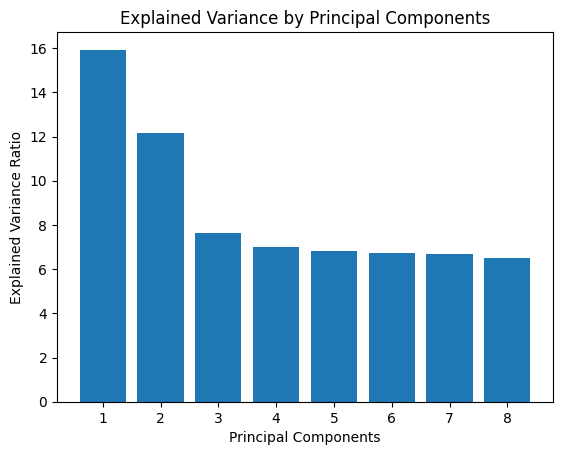

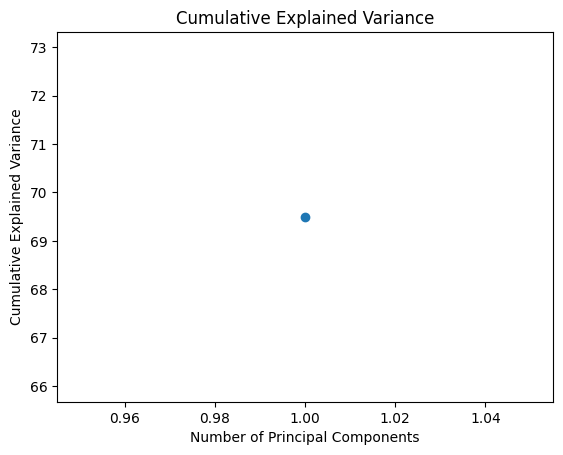

In [70]:
plt.bar(range(1, len(evr) + 1), evr)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

plt.plot(range(1, 2), cummulative_evr, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()